In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Dataset.csv')

In [3]:
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
74995,BMW,2016,12998,Manual,20565,Diesel,0,74.3,1.5
74996,toyota,2017,6995,Manual,20564,Petrol,150,68.9,1.0
74997,Ford,2018,10990,Manual,20563,Petrol,145,65.7,1.0
74998,Ford,2017,7999,Manual,28907,Petrol,125,54.3,1.2


In [4]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
print(dataset['transmission'].unique())

['Automatic' 'Manual' 'Semi-Auto' 'Other']


In [6]:
print(dataset['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [7]:
dataset.replace({'transmission' : {'Automatic' : 0, 'Manual' : 1, 'Semi-Auto' : 2, 'Other' : 3}}, inplace = True)

In [8]:
dataset.replace({'fuelType' : {'Petrol' : 0, 'Diesel' : 1, 'Hybrid' : 2, 'Electric' : 3, 'Other' : 4}}, inplace = True)

In [9]:
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,0,150,57.7,1.0
1,Focus,2018,14000,1,9083,0,150,57.7,1.0
2,Focus,2017,13000,1,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,0,1482,0,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
74995,BMW,2016,12998,1,20565,1,0,74.3,1.5
74996,toyota,2017,6995,1,20564,0,150,68.9,1.0
74997,Ford,2018,10990,1,20563,0,145,65.7,1.0
74998,Ford,2017,7999,1,28907,0,125,54.3,1.2


In [10]:
x = dataset.drop(['model', 'price'], axis=1).values
y = dataset['price']

In [11]:
x

array([[2.0170e+03, 0.0000e+00, 1.5944e+04, ..., 1.5000e+02, 5.7700e+01,
        1.0000e+00],
       [2.0180e+03, 1.0000e+00, 9.0830e+03, ..., 1.5000e+02, 5.7700e+01,
        1.0000e+00],
       [2.0170e+03, 1.0000e+00, 1.2456e+04, ..., 1.5000e+02, 5.7700e+01,
        1.0000e+00],
       ...,
       [2.0180e+03, 1.0000e+00, 2.0563e+04, ..., 1.4500e+02, 6.5700e+01,
        1.0000e+00],
       [2.0170e+03, 1.0000e+00, 2.8907e+04, ..., 1.2500e+02, 5.4300e+01,
        1.2000e+00],
       [2.0150e+03, 1.0000e+00, 2.1718e+04, ..., 2.0000e+01, 6.7300e+01,
        2.0000e+00]])

In [12]:
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
74995    12998
74996     6995
74997    10990
74998     7999
74999    13583
Name: price, Length: 75000, dtype: int64

In [13]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [14]:
standardized_x = scaler.transform(x)
standardized_x

array([[-0.03009016, -1.62040435, -0.3236475 , ...,  0.54647325,
         0.08894775, -1.05036414],
       [ 0.42117195,  0.14970396, -0.63186376, ...,  0.54647325,
         0.08894775, -1.05036414],
       [-0.03009016,  0.14970396, -0.4803387 , ...,  0.54647325,
         0.08894775, -1.05036414],
       ...,
       [ 0.42117195,  0.14970396, -0.11614846, ...,  0.46797767,
         0.5690561 , -1.05036414],
       [-0.03009016,  0.14970396,  0.25868851, ...,  0.15399535,
        -0.11509829, -0.68069377],
       [-0.93261437,  0.14970396, -0.06426247, ..., -1.49441184,
         0.66507777,  0.79798771]])

In [15]:
x = standardized_x
y = dataset['price']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)

print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(75000, 7) (67500, 7) (7500, 7)
(75000,) (67500,) (7500,)


In [17]:
xgb_model = XGBRegressor()

In [18]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
training_data_pred = xgb_model.predict(x_train)

score_train = metrics.r2_score(y_train, training_data_pred)
mean_abs_error = metrics.mean_absolute_error(y_train, training_data_pred)

print('Score on training data : ', score_train)
print('Mean absolute error on training data : ', mean_abs_error)

Score on training data :  0.9433386692076354
Mean absolute error on training data :  1488.0344786512587


In [20]:
test_data_pred = xgb_model.predict(x_test)

score_test = metrics.r2_score(y_test, test_data_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, test_data_pred)

print('Score on test data : ', score_test)
print('Mean absolute error on test data : ', mean_abs_error)

Score on test data :  0.9360363090230093
Mean absolute error on test data :  1605.0523907552083


In [21]:
input_data = (2019, 1, 10460, 0, 145, 40.3, 1.5)

input_changed = np.array(input_data).reshape(1, -1)

std_input = scaler.transform(input_changed)
prediction = xgb_model.predict(std_input)

print(prediction)

print('This car price estimation is : ', prediction)

[17605.312]
This car price estimation is :  [17605.312]


In [22]:
import joblib

In [23]:
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [25]:
r2 = r2_score(y_test, test_data_pred)
print("R2 Score:", r2)

R2 Score: 0.9360363090230093


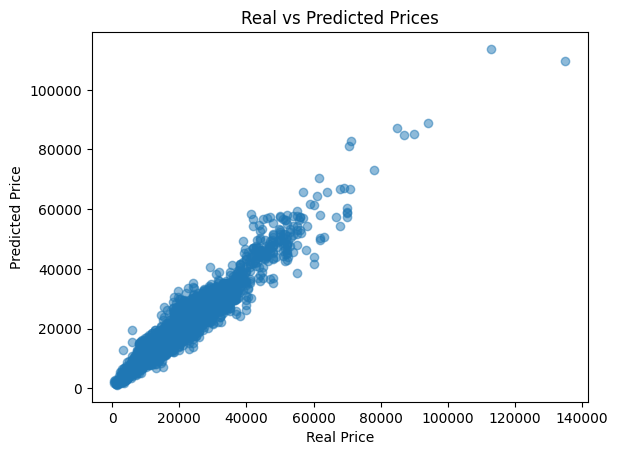

In [26]:
plt.scatter(y_test, test_data_pred, alpha=0.5)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted Prices")
plt.show()

In [27]:
test_data_pred = xgb_model.predict(x_test)

score_test = metrics.r2_score(y_test, test_data_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, test_data_pred)

print('Score on test data : ', score_test)
print('Mean absolute error on test data : ', mean_abs_error)

Score on test data :  0.9360363090230093
Mean absolute error on test data :  1605.0523907552083
